<a href="https://colab.research.google.com/github/narendra974/insidedeeplearning/blob/main/FC_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fully Connected Networks

To implement any kind of neural network in PyTorch we must phrase the problem as an optimization problem (function minimization)

1. Input Data and labels are feed into the process.
2. Output of the model is used with the true label to compute a loss.
3. quantifying how bad the model is doing with the loss function.
4. Compute the gradient of loss with each parameter. 
5. Update the parameters with the gradients calculated.



Function Minimization Problem

Alterthe parameters 'Theta' to minimize the error/lossof the neural network's prediction against the correct predictions over the entire dataset.

Parameter Learning Rule(Gradient Descent)

The new parameters Theta(k+1) are equal to the old parameters minus the gradient with respect to the old parameters of the error/loss of the neural networks prediction against the correct predictions averaged over the entire dataset and down-weighted by the learning rate.

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import *
from tqdm.autonotebook import tqdm

In [13]:
def moveTo(obj, device):
  if isinstance(obj, list):
    return [moveTo(x, device) for x in obj]
  elif isinstance(obj, tuple):
    return tuple(moveTo(list(obj), device))
  elif isinstance(obj, set):
    return set(moveTo(list(obj), device))
  elif isinstance(obj, dict):
    to_ret = dect()
    for key, value in obj.items():
      to_ret[moveTo(key, device)] = moveTo(value,device)
  elif hasattr(obj,"to"):
    return obj.to(device)
  else:
    return object

In [14]:
def train_simple_network(model, loss_fun, training_loader, epochs=20, device="cuda"):
  optimizer = torch.optim.SGD(model.parameters(), lr=0.001) # Learning rate to be provided.
  model.to(device)
  for epoch in tqdm(range(epochs), desc="Epoch"):
    model = model.train()  # put the model to train
    running_loss = 0.0
    for inputs, labels in tqdm(training_loader, desc='Batch', leave=False):
      inputs = moveTo(inputs, device)
      labels = moveTo(labels, device)
      optimizer.zero_grad() # remove old information from previous iteration.
      predicted_labels = model(inputs)
      loss = loss_fun(labels, predicted_labels)
      loss.backward() # for computing the gradients. 
      optimizer.step()   # Update the parameters. 
      running_loss = running_loss + loss.item()

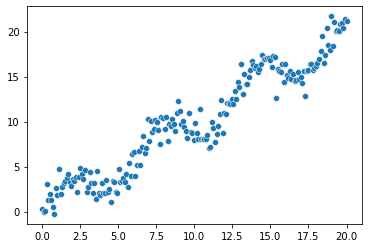

In [10]:
# Creation of 1-dimensional data set.
import  numpy as np
import seaborn as sns

X = np.linspace(0, 20, num=200)
y = X + np.sin(X)*2 + np.random.normal(size=X.shape)
sns.scatterplot(x=X, y=y)


In [11]:
class Simple1DRegressionDataset(Dataset):
  
  def __init__(self, X, y):
    super(Simple1DRegressionDataset, self).__init__()
    self.X = X.reshape(-1, 1)
    self.y = y.reshape(-1, 1)

  def __getitem__(self, index):
    return torch.tensor(self.X[index,:], dtype=torch.float32), torch.tensor(self.y[index], dtype=torch.float32)

  def __len__(self):
    return self.X.shape[0]

training_loader = DataLoader(Simple1DRegressionDataset(X, y), shuffle=True)

In [15]:
in_features=1
out_features=1

model = nn.Linear(in_features, out_features)
loss_func = nn.MSELoss()

device = torch.device("cuda")
train_simple_network(model, loss_func, training_loader, 20, device=device)

Epoch:   0%|          | 0/20 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

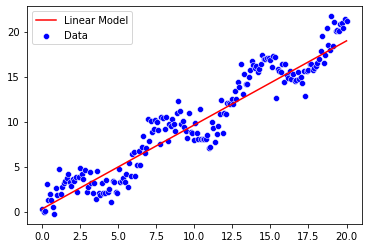

In [16]:
with torch.no_grad():
  Y_pred = model(torch.tensor(X.reshape(-1,1), device=device, dtype=torch.float32)).cpu().numpy()

sns.scatterplot(x=X, y=y, color='blue', label='Data')
sns.lineplot(x=X, y=Y_pred.ravel(),color='red', label='Linear Model')